# Musicnn Dataset Creation Notebook

---

Author: **Malek Ibrahim**

This notebook will handle all of the preset dataset creation for this project. Namely, we seek to create a dataset that has the following entries:

1. Preset Parameters: $p_i \in \mathbb{R}^{50 \times 1}$
2. Rendered Audio Clip: $y_p \in \mathbb{R}^{n \times 1}$ where $n$ is the number of audio samples for a given preset
3. Timbral Feature Vector: $z_p \in \mathbb{R}^{m \times 1}$ where $m$ is the size of the latent representation

This notebook is otherwise identical to `create-preset-dataset.ipynb`, except we seek to use `musicnn`, a deep learning sound model, to extract timbral features.




## Import Modules

---

We will be primarily using dawdreamer and various utility functions defined in `src/utils.py` for this task.

In [1]:
import sys; sys.path.append('../')
from src.utils import *
from musicnn.extractor import extractor
import dawdreamer as daw
import numpy as np
import pandas as pd

## 

## Render the Audio Data

---

For this section, we will have to make some choices on what note our synth preset should play, as well as how long each one should play for.

### Load the TAL-UNO Synth

---

For this work, we are using the TAL-U-NO-LX synth from [Togu Audio Line](https://tal-software.com/products/tal-u-no-lx) in order to generate a dataset of timbral features for a given preset. Although the TAL-U-NO-LX synth is a paid VST3 plugin, the synth has hundreds of hand-made presets that can be loaded into the synth that cover a wide range of sounds and offer a good starting point for further parameter optimization.

#### Configuration Defintitions

---

Below we define some settings that will be used for loading the plugin and creating the dataset, such as the sample rate, buffer size, and duration of the audio clips.

In [2]:
# Define constants
SAMPLE_RATE = 44100
BUFFER_SIZE = 128 # Parameters will undergo automation at this buffer/block size.
PPQN = 960 # Pulses per quarter note.
SYNTH_PLUGIN = "/Library/Audio/Plug-Ins/VST3/TAL-U-NO-LX-V2.vst3"  # extensions: .dll, .vst3, .vst, .component
SYNTH_NAME = "TAL-Uno"
PRESET_FOLDER = "/Users/malek8/Library/Application Support/ToguAudioLine/TAL-U-No-LX/presets"
PRESET_EXT = ".pjunoxl"
NOTES = ['C2','C3','C4']  # 2 octave range

In [3]:
# load the engine
engine = daw.RenderEngine(sample_rate=SAMPLE_RATE, block_size=BUFFER_SIZE)

# load the plugin
plugin = load_plugin_with_dawdreamer(SYNTH_PLUGIN,SYNTH_NAME,engine)

error: attempt to map invalid URI `/Library/Audio/Plug-Ins/VST3/TAL-U-NO-LX-V2.vst3'


### Create the Preset Dataset

---

Now we actually want to create the preset dataset, which we can accmplish by running the following code.

In [4]:
# create_preset_dataset() --> create a dataset of audio files from a preset folder in the form presented above
preset_dataset = create_muscinn_preset_dataset(PRESET_FOLDER,SYNTH_PLUGIN,SYNTH_NAME,SAMPLE_RATE,BUFFER_SIZE,NOTES,PRESET_EXT, extractor,verbose=False)

error: attempt to map invalid URI `/Library/Audio/Plug-Ins/VST3/TAL-U-NO-LX-V2.vst3'
/Users/malek8/miniconda3/envs/gass/lib/python3.10/site-packages/musicnn/models.py:58: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  normalized_input = tf.compat.v1.layers.batch_normalization(expand_input, training=is_training)
/Users/malek8/miniconda3/envs/gass/lib/python3.10/site-packages/musicnn/models.py:103: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv = tf.compat.v1.layers.conv2d(inputs=inputs,
/Users/malek8/miniconda3/envs/gass/lib/python3.10/site-packages/musicnn/models.py:108: UserWarning: `tf.layers.batch_normalization` is deprecated and will

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!


/Users/malek8/miniconda3/envs/gass/lib/python3.10/site-packages/musicnn/models.py:58: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  normalized_input = tf.compat.v1.layers.batch_normalization(expand_input, training=is_training)
/Users/malek8/miniconda3/envs/gass/lib/python3.10/site-packages/musicnn/models.py:103: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv = tf.compat.v1.layers.conv2d(inputs=inputs,
/Users/malek8/miniconda3/envs/gass/lib/python3.10/site-packages/musicnn/models.py:108: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` inst

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Computing spectrogram (w/ librosa) and tags (w/ 

## Correct the Parameter Vectors in the Dataset

### Load the Dataset

In [17]:
# load the dataset
df = pd.DataFrame(torch.load('preset_dataset_musicnn.pt'))

# print the first 5 rows of the dataset
df.head(5)

,preset_names,parameters,parameters_names,mapped_parameter_names,raw_audio,musicnn_features
0,Default,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[@modulation, @dcolfovalue, @dcopwmvalue, @dco...","[{'match': 'modulation', 'value': 0.0, 'index'...","{'C2': [tensor(-3.1763e-06), tensor(-0.0001), ...","{'C2': [tensor(-0.0003), tensor(-0.6242), tens..."
1,MT Tailwhip Organ (2),"[0.0, 0.0728217363357544, 0.4655496180057526, ...","[@modulation, @dcolfovalue, @dcopwmvalue, @dco...","[{'match': 'modulation', 'value': 0.0, 'index'...","{'C2': [tensor(1.1023e-05), tensor(2.2758e-05)...","{'C2': [tensor(-0.0003), tensor(-0.6242), tens..."
2,Super Jumper,"[0.0, 0.540000021, 0.444000036, 0.0, 0.0, 0.0,...","[@dcolfovalue, @dcopwmvalue, @dcopwmmode, @dco...","[{'match': 'dco lfo value', 'value': 0.0, 'ind...","{'C2': [tensor(-1.5057e-05), tensor(4.3656e-05...","{'C2': [tensor(-0.0003), tensor(-0.6242), tens..."
3,Nice Filter Sweep,"[0.0, 0.540000021, 0.444000036, 0.0, 0.0, 0.0,...","[@dcolfovalue, @dcopwmvalue, @dcopwmmode, @dco...","[{'match': 'dco lfo value', 'value': 0.0, 'ind...","{'C2': [tensor(-0.0130), tensor(0.0137), tenso...","{'C2': [tensor(-0.0003), tensor(-0.6242), tens..."
4,Chillin R2D2,"[0.0, 0.540000021, 0.444000036, 0.0, 0.0, 0.0,...","[@dcolfovalue, @dcopwmvalue, @dcopwmmode, @dco...","[{'match': 'dco lfo value', 'value': 0.0, 'ind...","{'C2': [tensor(0.0289), tensor(0.1960), tensor...","{'C2': [tensor(-0.0003), tensor(-0.6242), tens..."


### Visualize the Distribution of Parameter Vector Lengths

In [8]:
# obtain the lengths of the parameter vectors in the dataset
param_lengths = [len(x) for x in df['parameters']]

print("The minimum length of the parameter vectors is: ", min(param_lengths))
print("The maximum length of the parameter vectors is: ", max(param_lengths))

The minimum length of the parameter vectors is:  46
The maximum length of the parameter vectors is:  60


In [14]:
# set matplotlib plot settings to use latex font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})

In [15]:
# set matplotlib plot settings to have a transparent background, white font, and white grid lines
plt.rcParams.update({
    "figure.facecolor": "none",
    "axes.facecolor": "none",
    "savefig.facecolor": "none",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "axes.titlecolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "white",
    "grid.alpha": 0.5
})

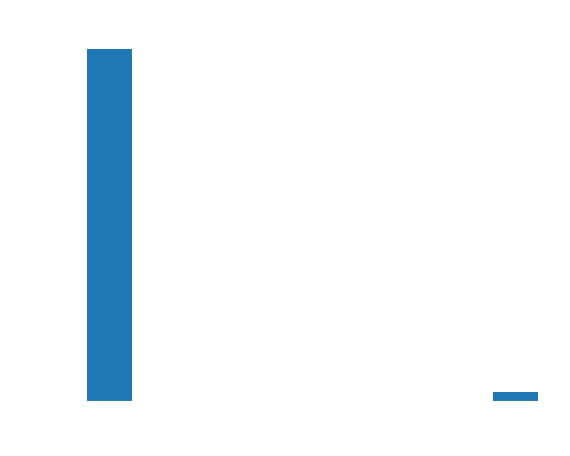

In [16]:
# visualize the distribution of the parameter vector lengths
plt.hist(param_lengths, bins=10)
plt.title("Distribution of Parameter Vector Lengths")
plt.xlabel("Parameter Vector Length")
plt.ylabel("Frequency")
plt.show()

### Find how the Parameter Vectors Differ

In [52]:
# create a copy of the dataframe
df_copy = df.copy()

In [53]:
# Verify the structure of the DataFrame
required_columns = ['preset_names', 'parameters', 'parameters_names']
if not all(col in df_copy.columns for col in required_columns):
    raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

In [54]:
try:
    default_preset = df_copy[df_copy['preset_names']=='Default'].iloc[0]
except IndexError:
    raise ValueError("DataFrame must contain a preset named 'Default'.")
print(default_preset)

preset_names                                                        Default
parameters                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...
parameters_names          [@modulation, @dcolfovalue, @dcopwmvalue, @dco...
mapped_parameter_names    [{'match': 'modulation', 'value': 0.0, 'index'...
raw_audio                 {'C2': [tensor(-3.1763e-06), tensor(-0.0001), ...
musicnn_features          {'C2': [tensor(-0.0003), tensor(-0.6242), tens...
Name: 0, dtype: object


In [55]:
# set some variables related to the default preset
default_preset_name = default_preset['preset_names']
default_parameters = default_preset['parameters']
default_parameter_names = default_preset['parameters_names']
default_mapped_parameter_names = default_preset['mapped_parameter_names']
# print(default_mapped_parameter_names)

In [56]:
# Check for non-unique parameter names in the default preset
if len(default_parameter_names) != len(set(default_parameter_names)):
    raise ValueError("Non-unique parameter names found in 'Default' preset")

In [57]:
# find all unique parameter names in the dataset
unique_parameter_names = set()
for parameter_names in df_copy['parameters_names']:
    unique_parameter_names.update(parameter_names)
unique_parameter_names = list(unique_parameter_names)
print(f'The legnth of the unique parameter names is: {len(unique_parameter_names)}')

The legnth of the unique parameter names is: 60


In [42]:
# define a function to add missing parameters to a row of the dataframe
def add_missing_parameters(row):
    if len(row['parameters']) == 46:
        # Update existing parameters
        new_parameters = [row['parameters'][row['parameters_names'].index(name)] if name in row['parameters_names'] else None for name in default_parameter_names]
        
        # Add missing parameters
        missing_parameters = set(default_parameter_names) - set(row['parameters_names'])
        for param_name in missing_parameters:
            new_parameters.append(default_parameters[default_parameter_names.index(param_name)])
            row['parameters_names'].append(param_name)
        
        row['parameters'] = new_parameters
    return row

In [43]:
# apply the function to the dataframe
df_copy = df_copy.apply(add_missing_parameters, axis=1)

In [44]:
# obtain the lengths of the parameter vectors in the dataset
param_lengths_copy = [len(x) for x in df_copy['parameters']]

In [48]:
print('There are {} parameter vectors with length 60'.format(param_lengths_copy.count(60)))

There are 4 parameter vectors with length 60


In [50]:
# find all the unique parameter names in the dataset
unique_parameter_names = set()
for row in df_copy['parameters_names']:
    unique_parameter_names.update(row)
unique_parameter_names = list(unique_parameter_names)
print(f'The legnth of the unique parameter names is: {len(unique_parameter_names)}')

The legnth of the unique parameter names is: 60


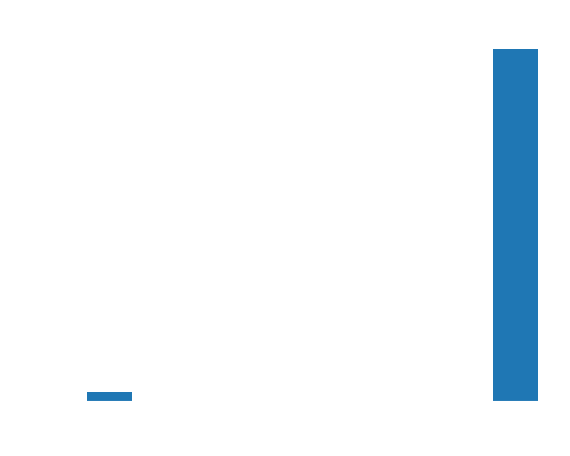

In [45]:
# visualize the distribution of the parameter vector lengths
plt.hist(param_lengths_copy, bins=10)
plt.title("Distribution of Parameter Vector Lengths")
plt.xlabel("Parameter Vector Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# add missing parameters to the non-default preset
for i, row in df.iterrows():
    if len(row['parameters']) == 46:
        new_parameters = []
        new_parameter_names = []
        for param_name, param_value in zip(default_parameter_names, default_parameters):
            if param_name in row['parameters_names']:
                index = row['parameters_names'].index(param_name)
                new_parameters.append(row['parameters'][index])
                new_parameter_names.append(param_name)
            elif param_name in missing_parameters:
                new_parameters.append(param_value)
                new_parameter_names.append(param_name)
        df.at[i,'parameters'] = new_parameters
        df.at[i,'parameters_names'] = new_parameter_names